In [100]:
import sklearn as sk
import matplotlib as plt
import pandas as pd


# Use read_csv() to load the CSV file into a pandas DataFrame
data = pd.read_csv('Data/full_data.csv',low_memory=False)

ann2_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
    'dividendRate',
    'dividendYield',
    'fiveYearAvgDividendYield',
]


ann2_data = data[ann2_variables]

In [101]:
ann2_call_data = ann2_data[ann2_data.call == 1]
ann2_put_data = ann2_data[ann2_data.call == 0]

ann2_call_data.drop('call', axis = 1, inplace = True)
ann2_put_data.drop('call', axis = 1, inplace = True)

C:\Users\domen\AppData\Local\Temp\ipykernel_4272\3590972737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann2_call_data.drop('call', axis = 1, inplace = True)
C:\Users\domen\AppData\Local\Temp\ipykernel_4272\3590972737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann2_put_data.drop('call', axis = 1, inplace = True)


In [102]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import keras


# Separate features and target
X = ann2_call_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_call_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)



In [103]:
ANN2_call = Sequential()
ANN2_call.add(Dense(30,input_dim = 7, activation = 'relu'))
ANN2_call.add(Dense(30, activation = 'relu'))
ANN2_call.add(Dense(30, activation = 'relu'))
ANN2_call.add(Dense(30, activation = 'relu'))
ANN2_call.add(Dense(1))

ANN2_call.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN2_call.fit(X_train,y_train,epochs = 200, batch_size = 32)

Epoch 1/200
973/973 [==============================] - 6s 3ms/step - loss: 1059.5591
Epoch 2/200
973/973 [==============================] - 3s 3ms/step - loss: 772.6454
Epoch 3/200
973/973 [==============================] - 3s 3ms/step - loss: 725.8804
Epoch 4/200
973/973 [==============================] - 3s 3ms/step - loss: 696.0984
Epoch 5/200
973/973 [==============================] - 3s 3ms/step - loss: 772.5214
Epoch 6/200
973/973 [==============================] - 3s 3ms/step - loss: 737.4769
Epoch 7/200
973/973 [==============================] - 3s 3ms/step - loss: 692.4070
Epoch 8/200
973/973 [==============================] - 3s 3ms/step - loss: 699.4277
Epoch 9/200
973/973 [==============================] - 3s 3ms/step - loss: 710.3552
Epoch 10/200
973/973 [==============================] - 3s 3ms/step - loss: 685.3241
Epoch 11/200
973/973 [==============================] - 3s 3ms/step - loss: 685.4766
Epoch 12/200
973/973 [==============================] - 2s 3ms/step - los

244/244 [==============================] - 1s 2ms/step


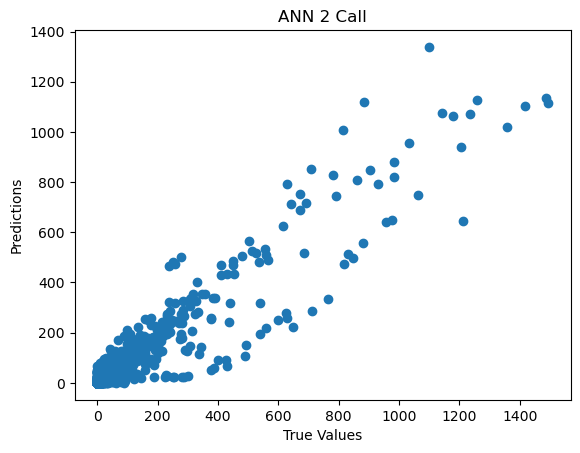

In [123]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Separate features and target
X = ann2_call_data[['strike', 'stock', 'tau', 'sigma', 'dividendRate','dividendYield','fiveYearAvgDividendYield',]]
y = ann2_call_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Make predictions
y_pred = ANN2_call.predict(X_test)

# Plot the true values against the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('ANN 2 Call')
plt.show()


In [124]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import keras


# Separate features and target
X = ann2_put_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_put_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [125]:
ANN2_put = Sequential()
ANN2_put.add(Dense(30, input_dim=7, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(30, activation='relu'))
ANN2_put.add(Dense(1))

ANN2_put.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN2_put.fit(X_train,y_train,epochs = 200, batch_size = 32)


Epoch 1/200
857/857 [==============================] - 4s 3ms/step - loss: 457.9953
Epoch 2/200
857/857 [==============================] - 2s 3ms/step - loss: 348.7011
Epoch 3/200
857/857 [==============================] - 2s 3ms/step - loss: 313.1118
Epoch 4/200
857/857 [==============================] - 3s 3ms/step - loss: 285.3506
Epoch 5/200
857/857 [==============================] - 3s 3ms/step - loss: 302.2818
Epoch 6/200
857/857 [==============================] - 3s 3ms/step - loss: 362.7919
Epoch 7/200
857/857 [==============================] - 2s 3ms/step - loss: 285.0510
Epoch 8/200
857/857 [==============================] - 2s 3ms/step - loss: 305.5459
Epoch 9/200
857/857 [==============================] - 3s 3ms/step - loss: 275.8454
Epoch 10/200
857/857 [==============================] - 3s 3ms/step - loss: 282.4849
Epoch 11/200
857/857 [==============================] - 3s 3ms/step - loss: 313.8867
Epoch 12/200
857/857 [==============================] - 2s 3ms/step - loss

KeyboardInterrupt: 

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Make predictions
y_pred = ANN2_put.predict(X_test)

# Plot the true values against the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('ANN 2 Put')
plt.show()

In [106]:
ANN2_call.save('models\\ann2\ANN2_call.keras')
ANN2_put.save('models\\ann2\ANN2_put.keras')

#### PERFORMANCE FOR CALL MODEL

In [107]:
from keras.models import load_model

# Load the model
ANN2_call = load_model('models\\ann2\\ANN2_call.keras')

In [108]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


# Separate features and target
X = ann2_call_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_call_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [109]:
X_test

,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield
10271,307.5,321.06,0.003968,0.420430,0.00,0.0000,0.00
36007,90.0,64.41,0.023810,0.711829,0.00,0.0000,0.00
63829,5.0,10.56,0.083333,0.633917,0.00,0.0000,0.00
24995,185.0,108.06,0.146825,0.261064,1.44,0.0123,0.92
69910,10.0,7.16,0.142857,0.333159,0.00,0.0000,0.00
...,...,...,...,...,...,...,...
13355,1760.0,1000.68,0.007937,0.960084,0.00,0.0000,0.00
35324,8.0,32.72,0.138889,0.791322,0.00,0.0000,0.00
39515,121.0,111.91,0.003968,0.513559,0.00,0.0000,0.00
17752,84.0,77.02,0.003968,0.254547,0.00,0.0000,0.00


In [110]:
X_test['ann2'] = ANN2_call.predict(X_test)
X_test

244/244 [==============================] - 1s 2ms/step


,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield,ann2
10271,307.5,321.06,0.003968,0.420430,0.00,0.0000,0.00,14.971061
36007,90.0,64.41,0.023810,0.711829,0.00,0.0000,0.00,0.132967
63829,5.0,10.56,0.083333,0.633917,0.00,0.0000,0.00,5.114547
24995,185.0,108.06,0.146825,0.261064,1.44,0.0123,0.92,0.317830
69910,10.0,7.16,0.142857,0.333159,0.00,0.0000,0.00,0.180138
...,...,...,...,...,...,...,...,...
13355,1760.0,1000.68,0.007937,0.960084,0.00,0.0000,0.00,0.941292
35324,8.0,32.72,0.138889,0.791322,0.00,0.0000,0.00,21.354351
39515,121.0,111.91,0.003968,0.513559,0.00,0.0000,0.00,0.631215
17752,84.0,77.02,0.003968,0.254547,0.00,0.0000,0.00,1.783001


In [111]:
X_test['price'] = y_test
X_test

,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield,ann2,price
10271,307.5,321.06,0.003968,0.420430,0.00,0.0000,0.00,14.971061,14.50
36007,90.0,64.41,0.023810,0.711829,0.00,0.0000,0.00,0.132967,0.01
63829,5.0,10.56,0.083333,0.633917,0.00,0.0000,0.00,5.114547,5.30
24995,185.0,108.06,0.146825,0.261064,1.44,0.0123,0.92,0.317830,0.03
69910,10.0,7.16,0.142857,0.333159,0.00,0.0000,0.00,0.180138,0.10
...,...,...,...,...,...,...,...,...,...
13355,1760.0,1000.68,0.007937,0.960084,0.00,0.0000,0.00,0.941292,0.04
35324,8.0,32.72,0.138889,0.791322,0.00,0.0000,0.00,21.354351,27.30
39515,121.0,111.91,0.003968,0.513559,0.00,0.0000,0.00,0.631215,1.75
17752,84.0,77.02,0.003968,0.254547,0.00,0.0000,0.00,1.783001,0.19


In [112]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
ANN2_call_mse = mean_squared_error(X_test['price'], X_test['ann2'])

# Calculate Root Mean Squared Error (RMSE)
ANN2_call_rmse = np.sqrt(ANN2_call_mse)

# Calculate Mean Absolute Error (MAE)
ANN2_call_mae = mean_absolute_error(X_test['price'], X_test['ann2'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN2_call_mape = np.mean(np.abs((X_test['price'] - X_test['ann2']) / X_test['price'])) * 100

# Calculate R-squared
ANN2_call_r_squared = r2_score(X_test['price'], X_test['ann2'])

print("Mean Squared Error (MSE):", ANN2_call_mse)
print("Root Mean Squared Error (RMSE):", ANN2_call_rmse)
print("Mean Absolute Error (MAE):", ANN2_call_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN2_call_mape)
print("R-squared:", ANN2_call_r_squared)

Mean Squared Error (MSE): 729.8113731988603
Root Mean Squared Error (RMSE): 27.015021251127312
Mean Absolute Error (MAE): 5.493070479203191
Mean Absolute Percentage Error (MAPE): 761.4551445709873
R-squared: 0.888293035229748


#### PERFORMANCE FOR PUT MODEL

In [113]:
from keras.models import load_model

# Load the model
ANN2_put = load_model('models\\ann2\\ANN2_PUT.keras')

In [114]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


# Separate features and target
X = ann2_put_data[[
        'strike',
        'stock', 
        'tau',
        'sigma',
        'dividendRate',
        'dividendYield',
        'fiveYearAvgDividendYield',
          ]]
y = ann2_put_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [115]:
X_test

,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield
49372,35.0,44.32,0.095238,0.410373,0.00,0.0000,0.00
765,138.0,147.68,0.003968,0.277048,0.00,0.0000,0.00
55721,40.0,61.72,0.452381,0.447565,0.00,0.0000,0.00
29949,70.0,128.69,0.027778,0.630169,0.00,0.0000,0.00
59768,20.0,15.91,0.250000,0.807918,0.00,0.0000,0.00
...,...,...,...,...,...,...,...
19362,140.0,141.38,0.087302,0.282565,0.97,0.0066,0.00
35822,67.5,78.00,0.079365,0.286145,1.00,0.0128,6.39
22724,180.0,182.55,0.071429,0.206939,6.80,0.0378,3.35
48638,67.5,67.65,0.079365,0.444620,0.00,0.0000,0.00


In [116]:
X_test['ann2'] = ANN2_put.predict(X_test)
X_test

215/215 [==============================] - 1s 2ms/step


,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield,ann2
49372,35.0,44.32,0.095238,0.410373,0.00,0.0000,0.00,2.409902
765,138.0,147.68,0.003968,0.277048,0.00,0.0000,0.00,4.062463
55721,40.0,61.72,0.452381,0.447565,0.00,0.0000,0.00,2.217134
29949,70.0,128.69,0.027778,0.630169,0.00,0.0000,0.00,2.892292
59768,20.0,15.91,0.250000,0.807918,0.00,0.0000,0.00,6.206931
...,...,...,...,...,...,...,...,...
19362,140.0,141.38,0.087302,0.282565,0.97,0.0066,0.00,7.288823
35822,67.5,78.00,0.079365,0.286145,1.00,0.0128,6.39,1.974548
22724,180.0,182.55,0.071429,0.206939,6.80,0.0378,3.35,3.191567
48638,67.5,67.65,0.079365,0.444620,0.00,0.0000,0.00,4.588582


In [117]:
X_test['price'] = y_test
X_test

,strike,stock,tau,sigma,dividendRate,dividendYield,fiveYearAvgDividendYield,ann2,price
49372,35.0,44.32,0.095238,0.410373,0.00,0.0000,0.00,2.409902,0.15
765,138.0,147.68,0.003968,0.277048,0.00,0.0000,0.00,4.062463,0.02
55721,40.0,61.72,0.452381,0.447565,0.00,0.0000,0.00,2.217134,0.57
29949,70.0,128.69,0.027778,0.630169,0.00,0.0000,0.00,2.892292,0.03
59768,20.0,15.91,0.250000,0.807918,0.00,0.0000,0.00,6.206931,6.00
...,...,...,...,...,...,...,...,...,...
19362,140.0,141.38,0.087302,0.282565,0.97,0.0066,0.00,7.288823,1.47
35822,67.5,78.00,0.079365,0.286145,1.00,0.0128,6.39,1.974548,0.08
22724,180.0,182.55,0.071429,0.206939,6.80,0.0378,3.35,3.191567,1.75
48638,67.5,67.65,0.079365,0.444620,0.00,0.0000,0.00,4.588582,0.25


In [118]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
ANN2_put_mse = mean_squared_error(X_test['price'], X_test['ann2'])

# Calculate Root Mean Squared Error (RMSE)
ANN2_put_rmse = np.sqrt(ANN2_put_mse)

# Calculate Mean Absolute Error (MAE)
ANN2_put_mae = mean_absolute_error(X_test['price'], X_test['ann2'])

# Calculate Mean Absolute Percentage Error (MAPE)
ANN2_put_mape = np.mean(np.abs((X_test['price'] - X_test['ann2']) / X_test['price'])) * 100

# Calculate R-squared
ANN2_put_r_squared = r2_score(X_test['price'], X_test['ann2'])

print("Mean Squared Error (MSE):", ANN2_put_mse)
print("Root Mean Squared Error (RMSE):", ANN2_put_rmse)
print("Mean Absolute Error (MAE):", ANN2_put_mae)
print("Mean Absolute Percentage Error (MAPE):", ANN2_put_mape)
print("R-squared:", ANN2_put_r_squared)


Mean Squared Error (MSE): 199.31508662399722
Root Mean Squared Error (RMSE): 14.117899511754475
Mean Absolute Error (MAE): 4.421255609546285
Mean Absolute Percentage Error (MAPE): 3167.201551327749
R-squared: 0.8548733153706003
